## Video 39


 What is a regression problem?
 - predict something out of the data, the question is not a yes or no question, but a number. So the solution might be, the thing on that image is a cat for about 75%.
  - Questions like: How much, how many, how ... can be answered with regression.

## Video 40


What kind of data is needed for a regression problem?
Ok some kind of data what you think are relevant to predict the answer from the neural network.

The way data has to be converted for a nn is for example the one hot encoding. So this means you create a list as long as all possible interpretations the data can have.
Is the data a cat or a dog or a mouse? One-Hot list maybe [0,1,0] for a dog.

This interpretation is also called a feature encoding and data representation.
1. Categorical Data Encoding
    - One-Hot Encoding: Converts categorical variables into binary vectors.
    - Label Encoding: Assigns each category a unique integer.
    - Ordinal Encoding: Like label encoding, but assumes an order in the categories.
    - Binary Encoding: Converts category indices to binary and stores them in multiple bits.
    - Target Encoding (Mean Encoding): Replaces categories with the mean of the target variable (useful for supervised learning).
2. Numerical Data Scaling & Normalization
    - Min-Max Scaling: Rescales values between 0 and 1.
    - Standardization (Z-score normalization): Centers values around 0 with unit variance.
    - Log Transformation: Used for skewed distributions.
    - Quantile Transformation: Maps data to a normal distribution.
3. Text Data Encoding
    - Bag of Words (BoW): Counts word occurrences.
    - TF-IDF (Term Frequency-Inverse Document Frequency): Adjusts word importance based on frequency across documents.
    - Word Embeddings (Word2Vec, GloVe, FastText): Maps words to dense vector spaces.
    - Character-Level Encoding: Similar to word embeddings, but on a character level.
4. Image Data Encoding
    - Raw Pixel Values: Direct input of pixel intensities.
    - Normalized Pixel Values: Pixels scaled to a range (e.g., 0-1 or -1 to 1).
    - Feature Extraction (HOG, SIFT, CNNs): Extracts meaningful features instead of raw pixels.
5. Graph Data Encoding
    - Adjacency Matrix Encoding: Represents connections between nodes as a matrix.
    - Graph Embeddings (Node2Vec, GCNs): Maps nodes to vector spaces.
6. Time Series & Sequential Data Encoding
    - Sliding Windows: Transforms time series into overlapping windows for learning.
    - Fourier Transform / Wavelet Transform: Extracts frequency-domain features.
    - Lag Features: Uses past values as inputs.



## Video 41

Architectures of Neural Networks
1. Feedforward Neural Networks (FNNs)
    - Basic neural network architecture
    - No feedback loops between neurons
    - Used for regression and classification tasks.
    - Variants
        - Single-layer perceptron: One layer of input nodes and one layer of output nodes, no hidden layers.
        - Multi-layer perceptron: Contains one or more hidden layers between the input and output layers.
2. Convolutional Neural Networks (CNNs)
    - Specialized for image data
    - Contains convolutional layers for feature extraction
        - Convolutional layers: Apply filters to input data to detect patterns.
        - Pooling layers: Reduce spatial dimensions of the data.
        - Fully connected layers: Perform classification based on extracted features.
    - Used for image classification, object detection, and segmentation tasks.
3. Recurrent Neural Networks (RNNs)
4. Transformer Neural Networks
5. Autoencoder Neural Networks
6. Generative Adversarial Networks (GANs)
7. Graph Neural Networks (GNNs)
8. Spike Neural Networks
9. etc.



## Video 42

**Definition of a regression problem:**
Method of the smallest absolute deviation ...

In [17]:
# disable the NUMA warning/support
import os
from cProfile import label

from keras.src.backend import shape
from keras.src.backend.jax.core import unstack

os.environ['TF_NUMA_ENABLED'] = '0'

In [18]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
# from tensorflow import keras as ks
import keras as ks

print(tf.__version__)

2.16.2


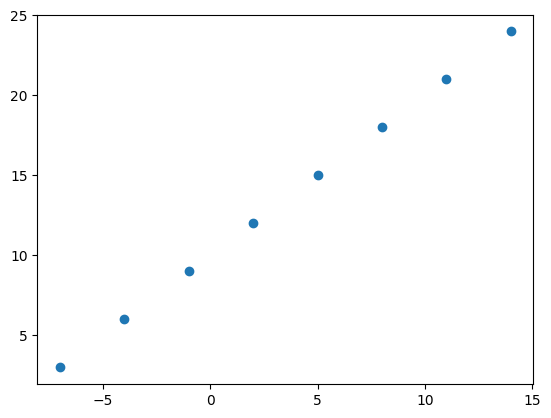

In [19]:
# create some data for first regression example

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y)

In [20]:
# check the pattern in the data idea
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [21]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [22]:
# example of housing info, video example
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

in this example the house_info has  the shape of 3 and the house_price has the shape of 1.
So what wr are trying to do is to make conclusions of the house_price out of the house_info.

## Video 44



In [23]:
# turn numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Start modelling with TensorFlow

1. Create a model: define input layer and hidden layers and output layer
2. Compile a model: define the loss function and the optimizer
3. Fit a model: let the model find patterns between X and y
4. Evaluate a model: check how well the model is doing

In [24]:
# set random seed
tf.random.set_seed(42)

# 1. create a model
model = ks.Sequential()
model.add(ks.layers.Input(shape=(1,)))
model.add(ks.layers.Dense(1))

# 2. compile the model
model.compile(loss=ks.losses.MeanAbsoluteError,
              optimizer=ks.optimizers.SGD(),
              metrics=['mae'])

# 3. fit the model
model.fit(X, y, epochs=5)


Epoch 1/5


2025-02-01 10:46:45.102168: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.6447 - mae: 9.6447
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 9.5122 - mae: 9.5122
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 9.3797 - mae: 9.3797
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9.2472 - mae: 9.2472
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 9.1147 - mae: 9.1147


In [28]:
X.dtype, y.dtype

(tf.float32, tf.float32)

In [26]:
X = tf.cast(X, dtype=tf.float32)
y = tf.cast(y, dtype=tf.float32)
X.dtype, y.dtype

(tf.float32, tf.float32)

In [27]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [34]:
try_1 = tf.constant([17.0])
try_1

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([17.], dtype=float32)>

In [37]:
pred_1 = model.predict(try_1)
pred_1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[21.7509]], dtype=float32)

In [38]:
type(pred_1)

numpy.ndarray

In [47]:
X_test = tf.constant([17, 20, 23, 26, 29, 31, 34, 37], dtype=tf.float32, shape=(8,))
predict = tf.cast(model.predict(X_test), dtype=tf.float32)
predict = tf.reshape(predict, shape=(8,))
X_test, predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([17., 20., 23., 26., 29., 31., 34., 37.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=
 array([21.7509  , 25.580471, 29.410042, 33.239613, 37.069183, 39.62223 ,
        43.4518  , 47.281372], dtype=float32)>)

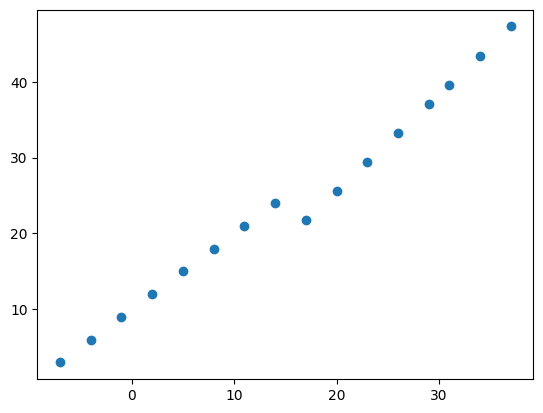

In [52]:
x_all = tf.concat([X, X_test], axis=0)
y_all = tf.concat([y, predict], axis=0)
plt.scatter(x_all, y_all)

In [89]:
def concat_pred_and_print(x_test: list, x, y, model):
    test = tf.cast(x_test, dtype=tf.float32)

    test_predict = model.predict(test)
    test_reshape = tf.reshape(test_predict, shape=(len(x_test),))

    x_all = tf.concat([x, test], axis=0)
    y_all = tf.concat([y, test_reshape], axis=0)
    plt.scatter(x_all, y_all)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


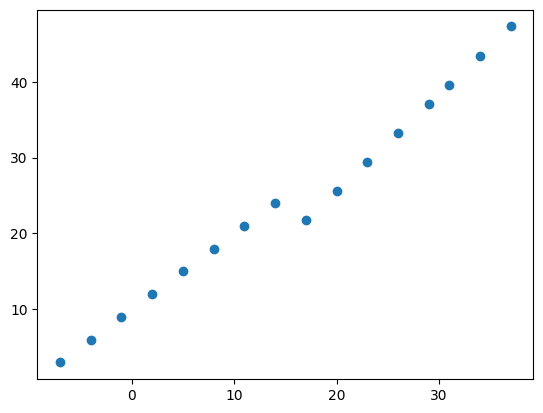

In [90]:
concat_pred_and_print([17, 20, 23, 26, 29, 31, 34, 37], X, y, model)

## Video 45

Optimierung des Modells

Idea, test to shuffle the learn data

In [54]:
stacked = tf.stack([X, y], axis=1)
stacked

<tf.Tensor: shape=(8, 2), dtype=float32, numpy=
array([[-7.,  3.],
       [-4.,  6.],
       [-1.,  9.],
       [ 2., 12.],
       [ 5., 15.],
       [ 8., 18.],
       [11., 21.],
       [14., 24.]], dtype=float32)>

In [93]:
shuffled = tf.random.shuffle(stacked)
shuffled

<tf.Tensor: shape=(8, 2), dtype=float32, numpy=
array([[-1.,  9.],
       [ 5., 15.],
       [14., 24.],
       [-7.,  3.],
       [-4.,  6.],
       [ 8., 18.],
       [11., 21.],
       [ 2., 12.]], dtype=float32)>

In [94]:
X, y = tf.unstack(shuffled, axis=1)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-1.,  5., 14., -7., -4.,  8., 11.,  2.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 9., 15., 24.,  3.,  6., 18., 21., 12.], dtype=float32)>)

In [95]:
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 8.3197 - mae: 8.3197
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 8.1872 - mae: 8.1872
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 8.0547 - mae: 8.0547
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 7.9222 - mae: 7.9222
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.7897 - mae: 7.7897


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


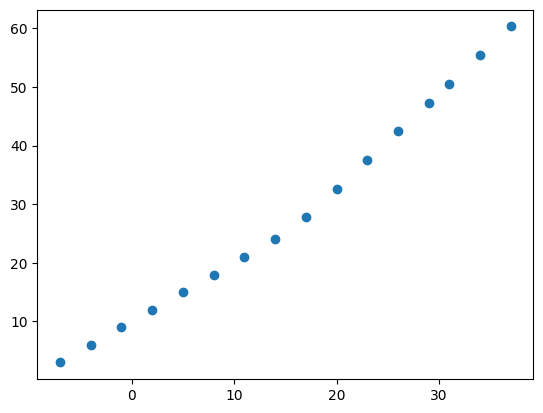

In [96]:
concat_pred_and_print([17, 20, 23, 26, 29, 31, 34, 37], X, y, model)

In [122]:
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0]) # 17, 20
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0]) # 27, 30
X_orig = tf.constant(X, dtype=tf.float32)
y_orig = tf.constant(y, dtype=tf.float32)

# 1. create a model
model = ks.Sequential()
model.add(ks.layers.Input(shape=(1,)))
model.add(ks.layers.Dense(100,  activation='relu'))
model.add(ks.layers.Dense(100, activation='relu'))
model.add(ks.layers.Dense(100, activation='relu'))
model.add(ks.layers.Dense(1, activation='relu'))

# 2. compile the model
model.compile(loss=ks.losses.MeanAbsoluteError,
              optimizer=ks.optimizers.Adam(learning_rate=0.001),
              metrics=['mae'])

# 3. fit the model
model.fit(X_orig, y_orig, epochs=40)

Epoch 1/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 869ms/step - loss: 13.3000 - mae: 13.3000
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 13.0860 - mae: 13.0860
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 12.8713 - mae: 12.8713
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 12.8794 - mae: 12.8794
Epoch 5/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 12.9030 - mae: 12.9030
Epoch 6/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 12.9211 - mae: 12.9211
Epoch 7/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 12.9349 - mae: 12.9349
Epoch 8/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 12.9452 - mae: 12.9452
Epoch 9/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 12.9525 - mae: 12.9525
Epoch 10/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 12.9571 - mae: 12.9571
Epoch 11/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 12.9597 - mae: 12.9597
Epoch 12/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 12.9602 - mae: 12.9602
Epoch 13/40
1/1 ━━━━━━━━━━━━━━━━━━━━

Optimizers
- Stochastic Gradient Descent (SGD): Updates weights based on the gradient of the loss function.
- Adam: Adaptive Moment Estimation, combines the advantages of RMSprop and momentum.
- RMSprop: Divides the learning rate by the moving average of the root mean square of the gradients.
- Adagrad: Adapts the learning rate to the parameters.
- Adadelta: Extends Adagrad to reduce aggressive, monotonically decreasing learning rates.
- Adamax: Generalization of Adam based on the infinity norm.
- Nadam: Adam with Nesterov momentum.
- FTRL: Follow the regularized leader optimizer.

In [156]:
X_orig = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0], dtype=tf.float64)
y_orig = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0], dtype=tf.float64)

# 1. create a model
model1 = ks.Sequential()
model1.add(ks.layers.Input(shape=(1,)))
model1.add(ks.layers.Dense(20, activation='relu'))
model1.add(ks.layers.Dense(20, activation='relu'))
model1.add(ks.layers.Dense(20, activation='relu'))
model1.add(ks.layers.Dense(20, activation='relu'))
model1.add(ks.layers.Dense(1))

# 2. compile the model
model1.compile(loss=ks.losses.MeanAbsoluteError,
              optimizer=ks.optimizers.Adam(),
              metrics=['mae'])

# 3. fit the model
model1.fit(X_orig, y_orig, epochs=200)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 13.3610 - mae: 13.3610
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 13.2659 - mae: 13.2659
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 13.1720 - mae: 13.1720
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 13.0786 - mae: 13.0786
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 12.9910 - mae: 12.9910
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 12.9078 - mae: 12.9078
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 12.8173 - mae: 12.8173
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 12.7265 - mae: 12.7265
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 12.6389 - mae: 12.6389
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 12.5540 - mae: 12.5540
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 12.4720 - mae: 12.4720
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 12.3910 - mae: 12.3910
Epoch 13/200
1/1 ━━━━━━━━━━

In [154]:
x_test = tf.constant([17.0, 20.0, 23.0, 26.0, 29.0, 31.0, 34.0, 37.0], dtype=tf.float32, shape=(8,))
y_test = tf.constant([27.0, 30.0, 33.0, 36.0, 39.0, 42.0, 45.0, 48.0], dtype=tf.float32)
x_test, y_test

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([17., 20., 23., 26., 29., 31., 34., 37.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([27., 30., 33., 36., 39., 42., 45., 48.], dtype=float32)>)

In [157]:
y_predict = model1.predict(x_test)
y_predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[25.293713],
       [29.141083],
       [32.988487],
       [36.83593 ],
       [40.68328 ],
       [43.24819 ],
       [47.09562 ],
       [50.943   ]], dtype=float32)

## Video 48

Visualize, Visualize, Visualize

In [160]:
x1_generated = [-7.0 + i*3 for i in range(100)]
y1_generated = [3.0 + i*3 for i in range(100)]
stack = tf.stack([x1_generated, y1_generated], axis=1)
stack

<tf.Tensor: shape=(100, 2), dtype=float32, numpy=
array([[ -7.,   3.],
       [ -4.,   6.],
       [ -1.,   9.],
       [  2.,  12.],
       [  5.,  15.],
       [  8.,  18.],
       [ 11.,  21.],
       [ 14.,  24.],
       [ 17.,  27.],
       [ 20.,  30.],
       [ 23.,  33.],
       [ 26.,  36.],
       [ 29.,  39.],
       [ 32.,  42.],
       [ 35.,  45.],
       [ 38.,  48.],
       [ 41.,  51.],
       [ 44.,  54.],
       [ 47.,  57.],
       [ 50.,  60.],
       [ 53.,  63.],
       [ 56.,  66.],
       [ 59.,  69.],
       [ 62.,  72.],
       [ 65.,  75.],
       [ 68.,  78.],
       [ 71.,  81.],
       [ 74.,  84.],
       [ 77.,  87.],
       [ 80.,  90.],
       [ 83.,  93.],
       [ 86.,  96.],
       [ 89.,  99.],
       [ 92., 102.],
       [ 95., 105.],
       [ 98., 108.],
       [101., 111.],
       [104., 114.],
       [107., 117.],
       [110., 120.],
       [113., 123.],
       [116., 126.],
       [119., 129.],
       [122., 132.],
       [125., 135.],
     

In [161]:
x1, y1 = tf.unstack(stack, axis=1)

model1 = ks.Sequential()
model1.add(ks.layers.Input(shape=(1,)))
model1.add(ks.layers.Dense(20, activation='relu'))
model1.add(ks.layers.Dense(20, activation='relu'))
model1.add(ks.layers.Dense(20, activation='relu'))
model1.add(ks.layers.Dense(20, activation='relu'))
model1.add(ks.layers.Dense(1))

# 2. compile the model
model1.compile(loss=ks.losses.MeanAbsoluteError,
              optimizer=ks.optimizers.Adam(),
              metrics=['mae'])

# 3. fit the model
model1.fit(x1, y1, epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 440ms/step - loss: 96.2601 - mae: 96.2601
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 69.4391 - mae: 69.4391
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 48.2677 - mae: 48.2677
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 23.7539 - mae: 23.7539
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.7122 - mae: 7.7122
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 16.3930 - mae: 16.3930
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.0179 - mae: 10.0179
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.4432 - mae: 8.4432
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 13.4727 - mae: 13.4727
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.4944 - mae: 9.4944  
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.2857 - mae: 5.2857
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.1086 - mae: 6.1086
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━

In [169]:
a = np.arange(0, 9, 0.3)
model1.predict(a)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


array([[3.0695589],
       [3.2601783],
       [3.4508011],
       [3.641424 ],
       [3.8320463],
       [4.0226746],
       [4.2132874],
       [4.4039   ],
       [4.594536 ],
       [4.7851486],
       [4.9757767],
       [5.1663895],
       [5.3570023],
       [5.5476456],
       [5.7382736],
       [5.928871 ],
       [6.1195145],
       [6.310158 ],
       [6.5007095],
       [6.691414 ],
       [6.8820267],
       [7.0725784],
       [7.2632523],
       [7.453926 ],
       [7.644539 ],
       [7.8351517],
       [8.025764 ],
       [8.216408 ],
       [8.407021 ],
       [8.597603 ]], dtype=float32)

In [176]:
a = np.arange(0, 30, 3)
a_test = np.arange(30, 60, 3)
b = np.arange(-7, 23, 3)
b_test = np.arange(23, 51, 3)
a, b, a_test, b_test

(array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27]),
 array([-7, -4, -1,  2,  5,  8, 11, 14, 17, 20]),
 array([30, 33, 36, 39, 42, 45, 48, 51, 54, 57]),
 array([23, 26, 29, 32, 35, 38, 41, 44, 47, 50]))

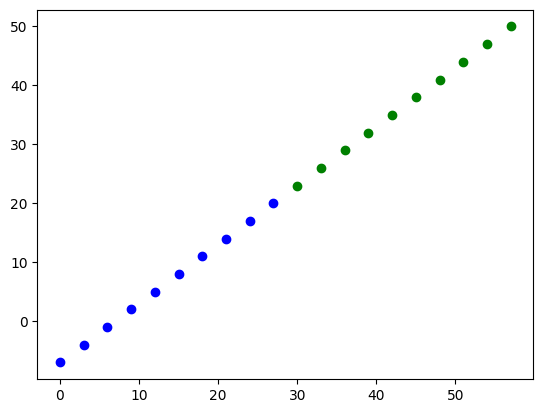

In [177]:
plt.scatter(a, b, c='blue')
plt.scatter(a_test, b_test, c='green')

In [178]:
model2 = ks.Sequential()
model2.add(ks.layers.Input(shape=(1,)))
model2.add(ks.layers.Dense(20, activation='relu'))
model2.add(ks.layers.Dense(20, activation='relu'))
model2.add(ks.layers.Dense(20, activation='relu'))
model2.add(ks.layers.Dense(1))

# 2. compile the model
model2.compile(loss=ks.losses.MeanAbsoluteError,
              optimizer=ks.optimizers.Adam(),
              metrics=['mae'])

# 3. fit the model
model2.fit(a, b, epochs=100)

b_predict = model2.predict(a_test)
b_predict

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 21.1419 - mae: 21.1419
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 20.5834 - mae: 20.5834
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 20.0177 - mae: 20.0177
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 19.4657 - mae: 19.4657
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 18.9241 - mae: 18.9241
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 18.3898 - mae: 18.3898
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 17.8597 - mae: 17.8597
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 17.3360 - mae: 17.3360
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 16.8203 - mae: 16.8203
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 16.3105 - mae: 16.3105
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 15.8133 - mae: 15.8133
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 15.3314 - mae: 15.3314
Epoch 13/100
1/1 ━━━━━━━━━━

array([[20.563683],
       [22.668514],
       [24.773344],
       [26.87818 ],
       [28.983013],
       [31.087841],
       [33.192677],
       [35.297504],
       [37.40234 ],
       [39.507168]], dtype=float32)

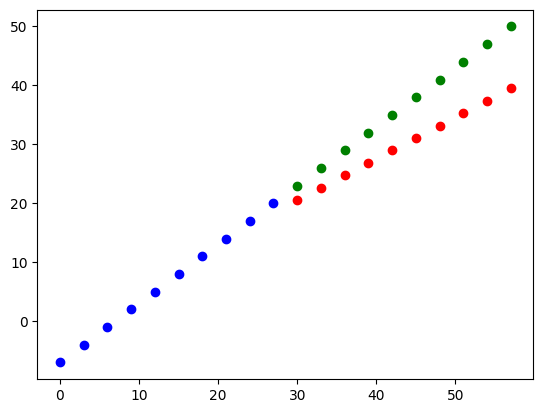

In [180]:
plt.scatter(a, b, c='blue')
plt.scatter(a_test, b_test, c='green')
plt.scatter(a_test, b_predict, c='red')

## creating extra data for learning

In [191]:
a_extend = []
b_extend = []
for i, j in zip(a, b):
    a_extend.append(i-0.02)
    a_extend.append(i-0.01)
    a_extend.append(i-0.2)
    a_extend.append(i-0.1)
    a_extend.append(i)
    a_extend.append(i+0.01)
    a_extend.append(i+0.02)
    a_extend.append(i+0.1)
    a_extend.append(i+0.2)
    b_extend.append(j-0.02)
    b_extend.append(j-0.01)
    b_extend.append(j-0.2)
    b_extend.append(j-0.1)
    b_extend.append(j)
    b_extend.append(j+0.01)
    b_extend.append(j+0.02)
    b_extend.append(j+0.1)
    b_extend.append(j+0.2)
a_extend, b_extend

([-0.02,
  -0.01,
  -0.2,
  -0.1,
  0,
  0.01,
  0.02,
  0.1,
  0.2,
  2.98,
  2.99,
  2.8,
  2.9,
  3,
  3.01,
  3.02,
  3.1,
  3.2,
  5.98,
  5.99,
  5.8,
  5.9,
  6,
  6.01,
  6.02,
  6.1,
  6.2,
  8.98,
  8.99,
  8.8,
  8.9,
  9,
  9.01,
  9.02,
  9.1,
  9.2,
  11.98,
  11.99,
  11.8,
  11.9,
  12,
  12.01,
  12.02,
  12.1,
  12.2,
  14.98,
  14.99,
  14.8,
  14.9,
  15,
  15.01,
  15.02,
  15.1,
  15.2,
  17.98,
  17.99,
  17.8,
  17.9,
  18,
  18.01,
  18.02,
  18.1,
  18.2,
  20.98,
  20.99,
  20.8,
  20.9,
  21,
  21.01,
  21.02,
  21.1,
  21.2,
  23.98,
  23.99,
  23.8,
  23.9,
  24,
  24.01,
  24.02,
  24.1,
  24.2,
  26.98,
  26.99,
  26.8,
  26.9,
  27,
  27.01,
  27.02,
  27.1,
  27.2],
 [-7.02,
  -7.01,
  -7.2,
  -7.1,
  -7,
  -6.99,
  -6.98,
  -6.9,
  -6.8,
  -4.02,
  -4.01,
  -4.2,
  -4.1,
  -4,
  -3.99,
  -3.98,
  -3.9,
  -3.8,
  -1.02,
  -1.01,
  -1.2,
  -1.1,
  -1,
  -0.99,
  -0.98,
  -0.9,
  -0.8,
  1.98,
  1.99,
  1.8,
  1.9,
  2,
  2.01,
  2.02,
  2.1,
  2.2,
  4.

In [193]:
a_extend = tf.constant(a_extend)
b_extend = tf.constant(b_extend)

model3 = ks.Sequential()
model3.add(ks.layers.Input(shape=(1,)))
model3.add(ks.layers.Dense(20, activation='relu'))
model3.add(ks.layers.Dense(20, activation='relu'))
model3.add(ks.layers.Dense(20, activation='relu'))
model3.add(ks.layers.Dense(1))

# 2. compile the model
model3.compile(loss=ks.losses.MeanAbsoluteError,
              optimizer=ks.optimizers.Adam(),
              metrics=['mae'])

# 3. fit the model
model3.fit(a_extend, b_extend, epochs=90)

Epoch 1/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 9.5395 - mae: 9.5395
Epoch 2/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 8.3515 - mae: 8.3515
Epoch 3/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 6.8917 - mae: 6.8917
Epoch 4/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 5.5558 - mae: 5.5558
Epoch 5/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.4732 - mae: 4.4732
Epoch 6/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.7173 - mae: 3.7173
Epoch 7/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.2655 - mae: 3.2655
Epoch 8/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.1649 - mae: 3.1649
Epoch 9/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.2863 - mae: 3.2863
Epoch 10/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.3935 - mae: 3.3935
Epoch 11/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.3080 - mae: 3.3080
Epoch 12/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.1218 - mae: 3.1218
Epoch 13/90
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.0

In [194]:
b_extend_predict = model3.predict(a_test)
b_extend_predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


array([[22.053453],
       [24.768085],
       [27.482721],
       [30.197361],
       [32.911995],
       [35.626633],
       [38.341263],
       [41.0559  ],
       [43.77054 ],
       [46.485172]], dtype=float32)

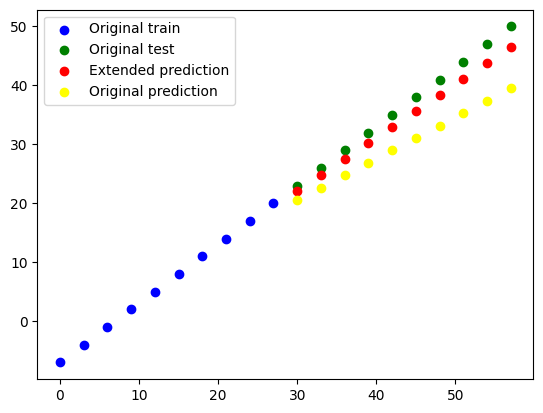

In [195]:
# plt.figure(figsize=(10, 7))
plt.scatter(a, b, c='blue', label='Original train')
plt.scatter(a_test, b_test, c='green', label='Original test')
plt.scatter(a_test, b_extend_predict, c='red', label='Extended prediction')
plt.scatter(a_test, b_predict, c='yellow', label='Original prediction')
plt.legend()

removing a little bit and adding a little bit generates much more data for learning. This is a good way to generate more data for learning. This is called data augmentation. (really, just invented it for myself)

how are tricks like this called in the real world copilot? Data augmentation, data preprocessing, data cleaning, data wrangling, data transformation